In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
def read_unit(path):
    return cv2.imread(path, cv2.IMREAD_UNCHANGED)

In [ ]:
def overlay_image(img, img_overlay, x, y):
    """Overlay `img_overlay` onto `img` at (x, y) using the alpha channels of both images.
    Assumes both images are in BGRA format with values from 0 to 255."""
    # Calculate the overlapping regions
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)

    # If there's no overlap, return
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    # Extract the overlapping regions
    img_crop = img[y1:y2, x1:x2]
    img_overlay_crop = img_overlay[y1o:y2o, x1o:x2o]

    # Extract alpha and color channels
    alpha_base = img_crop[:, :, 3] / 255
    alpha_overlay = img_overlay_crop[:, :, 3] / 255
    color_base = img_crop[:, :, :3]
    color_overlay = img_overlay_crop[:, :, :3]

    # Calculate the resulting alpha
    alpha_result = alpha_overlay + alpha_base * (1 - alpha_overlay)

    # To avoid division by zero, replace zeros with a small positive value
    alpha_result[alpha_result == 0] = 1e-6

    # Blend the colors
    color_result = (color_overlay * alpha_overlay[:, :, np.newaxis] +
                   color_base * alpha_base[:, :, np.newaxis] * (1 - alpha_overlay[:, :, np.newaxis])) / alpha_result[:, :, np.newaxis]

    # Clip the resulting color values to ensure they are within the valid range
    color_result = np.clip(color_result, 0, 255)

    # Update the base image
    img_crop[:, :, :3] = color_result.astype(np.uint8)
    img_crop[:, :, 3] = (alpha_result * 255).astype(np.uint8)


In [ ]:
def extend_tier(tier, unit):

    unit_height, unit_width = unit.shape[0], unit.shape[1]
    tier_height, tier_width = tier.shape[0], tier.shape[1]

    width_start = ((unit_width - 1) // 2) - ((tier_width - 1) // 2)
    width_end = ((unit_width + 1) // 2) + ((tier_width - 1) // 2)

    height_start = unit_height - tier_height + 3

    resized = np.zeros((unit_height + 3, unit_width, 4))
    resized[height_start:, width_start:width_end, :] = tier

    overlay_image(resized, unit, 0, 0)
    
    unit = resized


In [18]:
tier = read_unit('Units/icons/tier-3.png')
fighter = read_unit('Units/icons/air/fighter-green.png')

In [19]:
tierpp = extend_tier(tier, fighter)
fighter1 = overlay_image(tierpp, fighter, 0, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


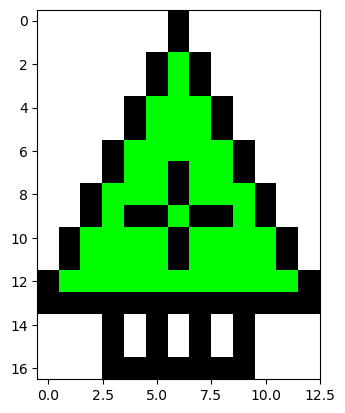

In [20]:
plt.imshow(tierpp)